In [2]:
from google.colab import files

uploaded = files.upload()


Saving financas_ficticias.csv to financas_ficticias.csv


In [3]:
import pandas as pd

df = pd.read_csv("financas_ficticias.csv")
df.head()


,data,categoria,descricao,valor,tipo
0,2025-01-01,Alimentação,Restaurante,337.42,Despesa
1,2025-01-01,Lazer,Bar,2004.45,Despesa
2,2025-01-02,Freelance,Projeto de dados,1286.83,Receita
3,2025-01-02,Alimentação,Supermercado,173.36,Despesa
4,2025-01-02,Saúde,Consulta,1961.79,Despesa


In [4]:
import pandas as pd

# Carregar o arquivo (faça upload do CSV no Colab ou use o caminho se estiver local)
df = pd.read_csv("financas_ficticias.csv")

# Visualizar as primeiras linhas
print(df.head())

# Converter a coluna de data para datetime
df['data'] = pd.to_datetime(df['data'])

# Criar colunas de ano e mês
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month

# Total por tipo (Receita, Despesa, Investimento)
totais_tipo = df.groupby('tipo')['valor'].sum()
print("\nTotais por tipo:")
print(totais_tipo)

# Saldo total (receita - despesa - investimento)
saldo = (
    df[df['tipo'] == 'Receita']['valor'].sum()
    - df[df['tipo'] == 'Despesa']['valor'].sum()
    - df[df['tipo'] == 'Investimento']['valor'].sum()
)
print(f"\nSaldo final: R$ {saldo:.2f}")


         data    categoria         descricao    valor     tipo
0  2025-01-01  Alimentação       Restaurante   337.42  Despesa
1  2025-01-01        Lazer               Bar  2004.45  Despesa
2  2025-01-02    Freelance  Projeto de dados  1286.83  Receita
3  2025-01-02  Alimentação      Supermercado   173.36  Despesa
4  2025-01-02        Saúde          Consulta  1961.79  Despesa

Totais por tipo:
tipo
Despesa         171010.23
Investimento     31033.71
Receita         142999.28
Name: valor, dtype: float64

Saldo final: R$ -59044.66


In [5]:
df.groupby("tipo")["valor"].sum()


,valor
tipo,
Despesa,171010.23
Investimento,31033.71
Receita,142999.28


In [6]:
df['ano_mes'] = df['data'].dt.to_period('M')

# Agrupar receitas, despesas e investimentos por mês
pivot = df.pivot_table(index="ano_mes", columns="tipo", values="valor", aggfunc="sum").fillna(0)

# Criar coluna de saldo
pivot["saldo"] = pivot.get("Receita", 0) - pivot.get("Despesa", 0) - pivot.get("Investimento", 0)
pivot


tipo,Despesa,Investimento,Receita,saldo
ano_mes,,,,
2025-01,59145.59,9941.35,37627.06,-31459.88
2025-02,44417.17,12879.02,56883.13,-413.06
2025-03,67447.47,8213.34,48489.09,-27171.72


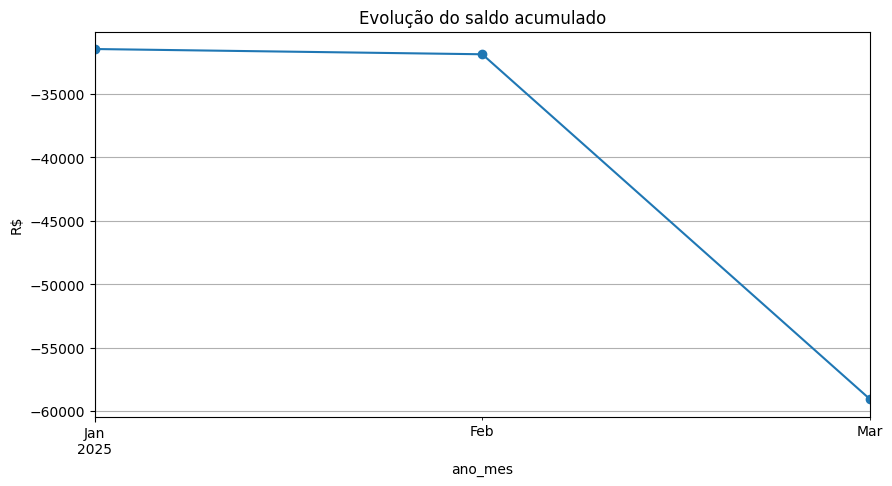

In [7]:
import matplotlib.pyplot as plt

pivot["saldo_acumulado"] = pivot["saldo"].cumsum()

pivot["saldo_acumulado"].plot(kind="line", marker="o", figsize=(10, 5), title="Evolução do saldo acumulado")
plt.ylabel("R$")
plt.grid(True)
plt.show()


Saving financas_ficticias.csv to financas_ficticias (1).csv
Totais por tipo:
 tipo
Despesa         171010.23
Investimento     31033.71
Receita         142999.28
Name: valor, dtype: float64

Totais por categoria:
 tipo          categoria     
Receita       Freelance         75018.93
              Salário           67980.35
Despesa       Saúde             33763.42
              Moradia           32148.22
              Lazer             28575.12
              Transporte        26955.19
              Educação          26423.68
              Alimentação       23144.60
Investimento  Renda Fixa        19218.23
              Tesouro Direto    11815.48
Name: valor, dtype: float64


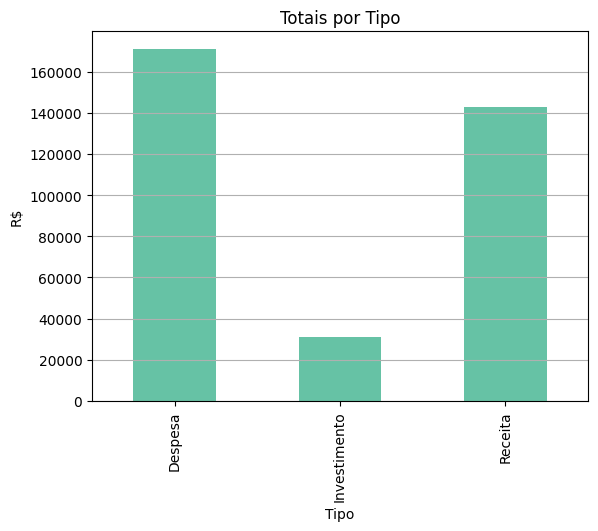

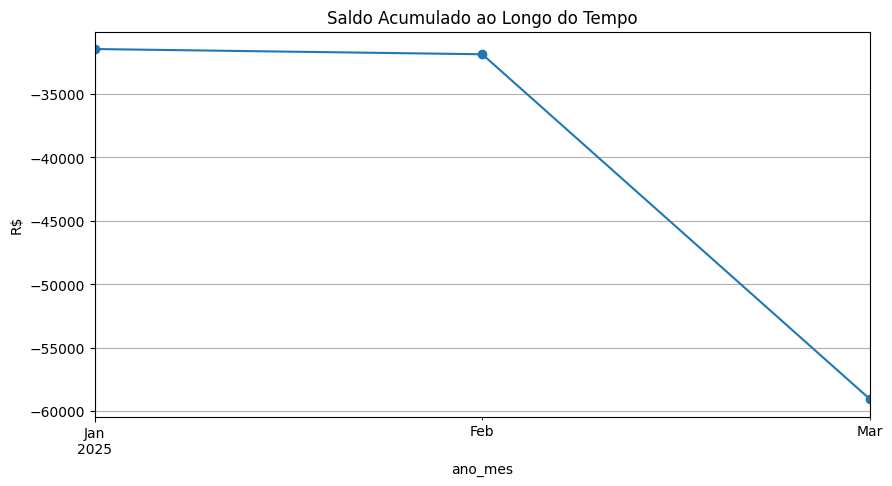

In [8]:
# 📌 PASSO 1: Upload do arquivo CSV
from google.colab import files
uploaded = files.upload()

# 📌 PASSO 2: Carregar os dados
import pandas as pd

df = pd.read_csv("financas_ficticias.csv")
df['data'] = pd.to_datetime(df['data'])
df['ano_mes'] = df['data'].dt.to_period('M')
df.head()

# 📌 PASSO 3: Análise por tipo (Receita, Despesa, Investimento)
totais = df.groupby('tipo')['valor'].sum()
print("Totais por tipo:\n", totais)

# 📌 PASSO 4: Análise por categoria
por_categoria = df.groupby(['tipo', 'categoria'])['valor'].sum().sort_values(ascending=False)
print("\nTotais por categoria:\n", por_categoria)

# 📌 PASSO 5: Evolução mensal e saldo acumulado
pivot = df.pivot_table(index="ano_mes", columns="tipo", values="valor", aggfunc="sum").fillna(0)
pivot["saldo_mensal"] = pivot.get("Receita", 0) - pivot.get("Despesa", 0) - pivot.get("Investimento", 0)
pivot["saldo_acumulado"] = pivot["saldo_mensal"].cumsum()
pivot

# 📌 PASSO 6: Gráficos
import matplotlib.pyplot as plt

# Gráfico de barras por tipo
totais.plot(kind='bar', title="Totais por Tipo", ylabel="R$", xlabel="Tipo", colormap="Set2")
plt.grid(axis='y')
plt.show()

# Gráfico de saldo acumulado
pivot["saldo_acumulado"].plot(marker='o', title="Saldo Acumulado ao Longo do Tempo", figsize=(10,5))
plt.ylabel("R$")
plt.grid(True)
plt.show()


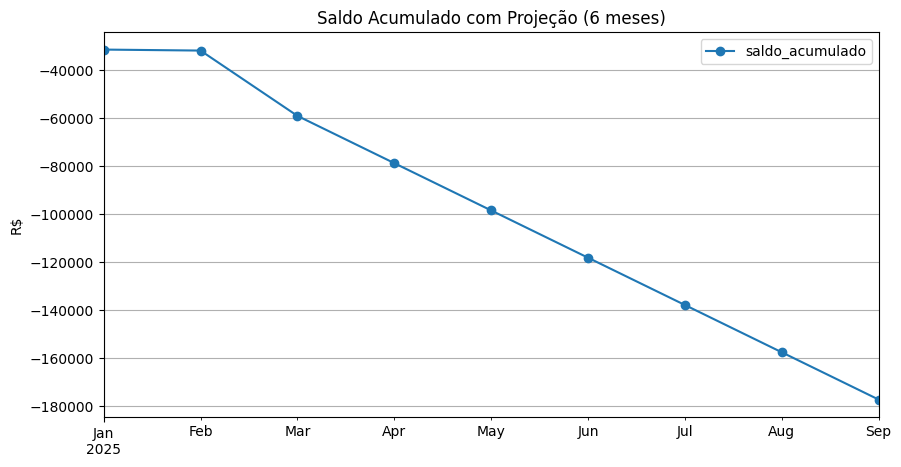

In [9]:
# Calcular média do saldo mensal
media_saldo = pivot["saldo_mensal"].mean()

# Projeção simples para os próximos 6 meses
futuro = pd.DataFrame({
    "saldo_mensal": [media_saldo] * 6
}, index=pd.period_range(start=pivot.index[-1] + 1, periods=6, freq='M'))

futuro["saldo_acumulado"] = pivot["saldo_acumulado"].iloc[-1] + futuro["saldo_mensal"].cumsum()

# Juntar com o histórico
projecao = pd.concat([pivot[["saldo_acumulado"]], futuro[["saldo_acumulado"]]])
projecao.plot(marker='o', title="Saldo Acumulado com Projeção (6 meses)", figsize=(10,5))
plt.ylabel("R$")
plt.grid(True)
plt.show()
